**Белянинов ПМ22-1**

# Семинарская работа

1. Прочитайте три однотипных файла с данными по обращениям клиентов в службу технической поддержки. Познакомьтесь со структурой этих трех таблиц и их особенностями.
2. Объедините три эти таблицы в один общий датасет с максимальным соблюдением внутренней согласованности данных.
3. Прочитайте датасет с данными заказов клиентов, присоедините максимальное количество данных из него к датасету, получившемуся на предыдущем шаге.
4. Прочитайте датасет с данными о менеджерах службы клиентской поддержки и также присоедините данные из него к общему датасету.

In [86]:
import pandas as pd
import numpy as np
import sympy as sp
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
data1 = pd.read_csv('issues1.csv', index_col=0)
data1.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,04/08/2023 19:10,04/08/2023 19:13,04-Aug-23,J. Blackwell,1
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,18/08/2023 09:11,18/08/2023 09:18,18-Aug-23,M. Wilson,4
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,22/08/2023 07:15,22/08/2023 08:15,22-Aug-23,A. Smith,5
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,14/08/2023 09:21,14/08/2023 09:27,14-Aug-23,A. Berry,5
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,03/08/2023 08:18,03/08/2023 08:23,03-Aug-23,S. Taylor,5


In [25]:
data2 = pd.read_csv('issues2.csv', index_col=0)
data2

,Id,channel_name,category,Sub-category,Order_id,Reported at,Responded at,Survey responded at,Agent_name,CSAT Score
0,6ba211fe-7643-4998-a7f7-cf34e5a4322c,Inbound,Order Related,Delayed,2dab4a7a-baf0-49f9-9d84-c8acdb4a11db,"21 08 2023, 09:01:00 PM","21 08 2023, 09:04:00 PM",21 08 2023,A. Rodriguez,5
1,acef2550-cdd7-4e6a-b5b8-6d9627da9549,Inbound,Cancellation,Not Needed,5993a1f0-570d-4c82-95d9-6cc56c78043e,"18 08 2023, 09:20:00 PM","18 08 2023, 09:20:00 PM",18 08 2023,R. Lee,5
2,46d012ec-cb21-40ce-afe1-5fe78905250a,Inbound,Returns,Return request,b64f579f-d913-4e85-978f-d0f6de902c3f,"24 08 2023, 09:57:00 PM","24 08 2023, 09:58:00 PM",24 08 2023,S. Douglas,5
3,1671c7fa-e527-4a05-8f1f-9a865dad9778,Outcall,Cancellation,Not Needed,b754581f-a2a4-4ef2-abb1-aca09ac1a89c,"28 08 2023, 11:38:00 PM","29 08 2023, 05:55:00 AM",29 08 2023,T. Adams,5
4,6e1923bd-de16-462b-a3ec-c60fb0ffe194,Inbound,Refund Related,Refund Enquiry,a1c40c79-e7a6-4faa-b948-0a32c3e3576a,"30 08 2023, 11:03:00 AM","30 08 2023, 11:04:00 AM",30 08 2023,L. Beck,5
...,...,...,...,...,...,...,...,...,...,...
44334,0e5c4973-24bc-4d7d-9eb4-54c868721109,Inbound,Product Queries,Product Specific Information,74ca7f8d-9c52-4902-b981-6fb6a5932c72,"08 08 2023, 12:13:00 PM","08 08 2023, 06:44:00 PM",08 08 2023,J. Kelly,5
44335,2fb101c6-3f7d-46ea-a0cb-c6a7b085d1d1,Inbound,Shopzilla Related,General Enquiry,7cc638a3-6273-4e2a-86ea-60436df6c0b9,"22 08 2023, 07:37:00 PM","22 08 2023, 08:21:00 PM",22 08 2023,S. Nelson,5
44336,cbb0d288-a7d7-40b8-a52a-2896ba4d7ce2,Inbound,Returns,Return request,af616b51-6739-48cd-a8f5-4f04b5eb8f79,"08 12 2023, 04:39:00 PM","12 08 2023, 04:43:00 PM",12 08 2023,D. Terry,5
44337,8de9d211-cf76-4447-962c-0517b922b548,Inbound,Returns,Service Centres Related,95de5b8a-145e-4282-a631-ddec3017d912,"27 08 2023, 08:19:00 AM","27 08 2023, 08:21:00 AM",27 08 2023,G. Jones,5


In [26]:
data3 = pd.read_csv('issues4.csv', index_col=0)
data3.head()

,Unique id,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Agent,CSAT Score
0,3350ccee-ead7-40fa-80c6-cc7b5e6e345a,Inbound,Returns,Reverse Pickup Enquiry,"August 27, 2023, 08:28:00 AM","August 27, 2023, 08:29:00 AM","August 27, 2023, 12:00:00 AM",Terry Young,5
1,4a88df6e-aafb-477a-bd8e-63ffc34c1a43,Inbound,Returns,Wrong,"December 08, 2023, 03:04:00 PM","August 12, 2023, 03:19:00 PM","August 12, 2023, 12:00:00 AM",Brenda Cox,4
2,7b5dbea2-2370-490a-8fef-4c5f7c52a4cc,Inbound,Returns,Reverse Pickup Enquiry,"August 13, 2023, 12:45:00 PM","August 13, 2023, 01:02:00 PM","August 13, 2023, 12:00:00 AM",Brian Mcguire,5
3,c6d4401e-a4ef-4de0-af68-a8755b928f5f,Inbound,Refund Related,Refund Enquiry,"June 08, 2023, 06:07:00 PM","August 06, 2023, 06:08:00 PM","August 06, 2023, 12:00:00 AM",Dr. Heather Lewis,5
4,423bd17e-e944-4f6e-beff-9c97fa325d9e,Inbound,Returns,Reverse Pickup Enquiry,"April 08, 2023, 10:05:00 PM","August 04, 2023, 10:08:00 PM","August 04, 2023, 12:00:00 AM",Kristin Adams,5


In [27]:
data1.shape, data2.shape, data3.shape

((28425, 11), (44339, 10), (13143, 9))

##### Вертикальная интеграция данных

In [28]:
pd.concat([data1, data2]).head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,channel_name,Reported at,Responded at,Survey responded at
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,04/08/2023 19:10,04/08/2023 19:13,04-Aug-23,J. Blackwell,1,NaN,NaN,NaN,NaN
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,18/08/2023 09:11,18/08/2023 09:18,18-Aug-23,M. Wilson,4,NaN,NaN,NaN,NaN
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,22/08/2023 07:15,22/08/2023 08:15,22-Aug-23,A. Smith,5,NaN,NaN,NaN,NaN
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,14/08/2023 09:21,14/08/2023 09:27,14-Aug-23,A. Berry,5,NaN,NaN,NaN,NaN
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,03/08/2023 08:18,03/08/2023 08:23,03-Aug-23,S. Taylor,5,NaN,NaN,NaN,NaN


In [29]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28425 entries, 0 to 28424
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    28425 non-null  object
 1   Channel               28425 non-null  object
 2   category              28425 non-null  object
 3   Sub-category          28425 non-null  object
 4   Customer Remarks      28425 non-null  object
 5   Order_id              22389 non-null  object
 6   Issue_reported_Date   28425 non-null  object
 7   Issue_responded_Date  28425 non-null  object
 8   Survey_response_Date  28425 non-null  object
 9   Agent_name            28425 non-null  object
 10  CSAT Score            28425 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 2.6+ MB


In [30]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44339 entries, 0 to 44338
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   44339 non-null  object
 1   channel_name         44339 non-null  object
 2   category             44339 non-null  object
 3   Sub-category         44339 non-null  object
 4   Order_id             44272 non-null  object
 5   Reported at          44339 non-null  object
 6   Responded at         44339 non-null  object
 7   Survey responded at  44339 non-null  object
 8   Agent_name           44339 non-null  object
 9   CSAT Score           44339 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 3.7+ MB


In [31]:
data2 = data2.rename(columns={
    'channel_name': 'Channel',
    'Reported at': 'Issue_reported_Date',
    'Responded at': 'Issue_responded_Date',
    'Survey responded at': 'Survey_response_Date',
})

In [32]:
data2['Issue_reported_Date'] = pd.to_datetime(data2['Issue_reported_Date'])
data2['Issue_responded_Date'] = pd.to_datetime(data2['Issue_responded_Date'])
data2['Survey_response_Date'] = pd.to_datetime(data2['Survey_response_Date'], format='%d %m %Y')

C:\Users\Ilya\AppData\Local\Temp\ipykernel_14304\1106061918.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2['Issue_reported_Date'] = pd.to_datetime(data2['Issue_reported_Date'])
C:\Users\Ilya\AppData\Local\Temp\ipykernel_14304\1106061918.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2['Issue_responded_Date'] = pd.to_datetime(data2['Issue_responded_Date'])


In [33]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44339 entries, 0 to 44338
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    44339 non-null  object        
 1   Channel               44339 non-null  object        
 2   category              44339 non-null  object        
 3   Sub-category          44339 non-null  object        
 4   Order_id              44272 non-null  object        
 5   Issue_reported_Date   44339 non-null  datetime64[ns]
 6   Issue_responded_Date  44339 non-null  datetime64[ns]
 7   Survey_response_Date  44339 non-null  datetime64[ns]
 8   Agent_name            44339 non-null  object        
 9   CSAT Score            44339 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(6)
memory usage: 3.7+ MB


In [34]:
data2.head()

,Id,Channel,category,Sub-category,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,6ba211fe-7643-4998-a7f7-cf34e5a4322c,Inbound,Order Related,Delayed,2dab4a7a-baf0-49f9-9d84-c8acdb4a11db,2023-08-21 21:01:00,2023-08-21 21:04:00,2023-08-21,A. Rodriguez,5
1,acef2550-cdd7-4e6a-b5b8-6d9627da9549,Inbound,Cancellation,Not Needed,5993a1f0-570d-4c82-95d9-6cc56c78043e,2023-08-18 21:20:00,2023-08-18 21:20:00,2023-08-18,R. Lee,5
2,46d012ec-cb21-40ce-afe1-5fe78905250a,Inbound,Returns,Return request,b64f579f-d913-4e85-978f-d0f6de902c3f,2023-08-24 21:57:00,2023-08-24 21:58:00,2023-08-24,S. Douglas,5
3,1671c7fa-e527-4a05-8f1f-9a865dad9778,Outcall,Cancellation,Not Needed,b754581f-a2a4-4ef2-abb1-aca09ac1a89c,2023-08-28 23:38:00,2023-08-29 05:55:00,2023-08-29,T. Adams,5
4,6e1923bd-de16-462b-a3ec-c60fb0ffe194,Inbound,Refund Related,Refund Enquiry,a1c40c79-e7a6-4faa-b948-0a32c3e3576a,2023-08-30 11:03:00,2023-08-30 11:04:00,2023-08-30,L. Beck,5


In [35]:
data1['Issue_reported_Date'] = pd.to_datetime(data1['Issue_reported_Date'])
data1['Issue_responded_Date'] = pd.to_datetime(data1['Issue_responded_Date'])
data1['Survey_response_Date'] = pd.to_datetime(data1['Survey_response_Date'], format='%d-%b-%y')

ValueError: time data "18/08/2023 09:11" doesn't match format "%m/%d/%Y %H:%M", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [36]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28425 entries, 0 to 28424
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    28425 non-null  object
 1   Channel               28425 non-null  object
 2   category              28425 non-null  object
 3   Sub-category          28425 non-null  object
 4   Customer Remarks      28425 non-null  object
 5   Order_id              22389 non-null  object
 6   Issue_reported_Date   28425 non-null  object
 7   Issue_responded_Date  28425 non-null  object
 8   Survey_response_Date  28425 non-null  object
 9   Agent_name            28425 non-null  object
 10  CSAT Score            28425 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 2.6+ MB


In [37]:
data_12 = pd.concat([data1, data2])
data_12.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,04/08/2023 19:10,04/08/2023 19:13,04-Aug-23,J. Blackwell,1
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,18/08/2023 09:11,18/08/2023 09:18,18-Aug-23,M. Wilson,4
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,22/08/2023 07:15,22/08/2023 08:15,22-Aug-23,A. Smith,5
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,14/08/2023 09:21,14/08/2023 09:27,14-Aug-23,A. Berry,5
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,03/08/2023 08:18,03/08/2023 08:23,03-Aug-23,S. Taylor,5


In [38]:
data_12.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72764 entries, 0 to 44338
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    72764 non-null  object
 1   Channel               72764 non-null  object
 2   category              72764 non-null  object
 3   Sub-category          72764 non-null  object
 4   Customer Remarks      28425 non-null  object
 5   Order_id              66661 non-null  object
 6   Issue_reported_Date   72764 non-null  object
 7   Issue_responded_Date  72764 non-null  object
 8   Survey_response_Date  72764 non-null  object
 9   Agent_name            72764 non-null  object
 10  CSAT Score            72764 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 6.7+ MB


In [39]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13143 entries, 0 to 13142
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unique id             13143 non-null  object
 1   channel_name          13143 non-null  object
 2   category              13143 non-null  object
 3   Sub-category          13143 non-null  object
 4   Issue_reported at     13143 non-null  object
 5   issue_responded       13143 non-null  object
 6   Survey_response_Date  13143 non-null  object
 7   Agent                 13143 non-null  object
 8   CSAT Score            13143 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [40]:
data3 = data3.rename(columns={
    'Unique id': 'Id',
    'channel_name': 'Channel',
    'Issue_reported at': 'Issue_reported_Date',
    'issue_responded': 'Issue_responded_Date',
    'Survey responded at': 'Survey_response_Date',
    'Agent': 'Agent_name'
})

In [41]:
data3['Issue_reported_Date'] = pd.to_datetime(data3['Issue_reported_Date'])
data3['Issue_responded_Date'] = pd.to_datetime(data3['Issue_responded_Date'])
data3['Survey_response_Date'] = pd.to_datetime(data3['Survey_response_Date'])

C:\Users\Ilya\AppData\Local\Temp\ipykernel_14304\2374507791.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data3['Survey_response_Date'] = pd.to_datetime(data3['Survey_response_Date'])


In [42]:
data3.head()

,Id,Channel,category,Sub-category,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,3350ccee-ead7-40fa-80c6-cc7b5e6e345a,Inbound,Returns,Reverse Pickup Enquiry,2023-08-27 08:28:00,2023-08-27 08:29:00,2023-08-27,Terry Young,5
1,4a88df6e-aafb-477a-bd8e-63ffc34c1a43,Inbound,Returns,Wrong,2023-12-08 15:04:00,2023-08-12 15:19:00,2023-08-12,Brenda Cox,4
2,7b5dbea2-2370-490a-8fef-4c5f7c52a4cc,Inbound,Returns,Reverse Pickup Enquiry,2023-08-13 12:45:00,2023-08-13 13:02:00,2023-08-13,Brian Mcguire,5
3,c6d4401e-a4ef-4de0-af68-a8755b928f5f,Inbound,Refund Related,Refund Enquiry,2023-06-08 18:07:00,2023-08-06 18:08:00,2023-08-06,Dr. Heather Lewis,5
4,423bd17e-e944-4f6e-beff-9c97fa325d9e,Inbound,Returns,Reverse Pickup Enquiry,2023-04-08 22:05:00,2023-08-04 22:08:00,2023-08-04,Kristin Adams,5


In [43]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13143 entries, 0 to 13142
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    13143 non-null  object        
 1   Channel               13143 non-null  object        
 2   category              13143 non-null  object        
 3   Sub-category          13143 non-null  object        
 4   Issue_reported_Date   13143 non-null  datetime64[ns]
 5   Issue_responded_Date  13143 non-null  datetime64[ns]
 6   Survey_response_Date  13143 non-null  datetime64[ns]
 7   Agent_name            13143 non-null  object        
 8   CSAT Score            13143 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(5)
memory usage: 1.0+ MB


In [44]:
data_123 = pd.concat([data_12, data3])
data_123.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,04/08/2023 19:10,04/08/2023 19:13,04-Aug-23,J. Blackwell,1
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,18/08/2023 09:11,18/08/2023 09:18,18-Aug-23,M. Wilson,4
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,22/08/2023 07:15,22/08/2023 08:15,22-Aug-23,A. Smith,5
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,14/08/2023 09:21,14/08/2023 09:27,14-Aug-23,A. Berry,5
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,03/08/2023 08:18,03/08/2023 08:23,03-Aug-23,S. Taylor,5


In [45]:
data_123.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85907 entries, 0 to 13142
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    85907 non-null  object
 1   Channel               85907 non-null  object
 2   category              85907 non-null  object
 3   Sub-category          85907 non-null  object
 4   Customer Remarks      28425 non-null  object
 5   Order_id              66661 non-null  object
 6   Issue_reported_Date   85907 non-null  object
 7   Issue_responded_Date  85907 non-null  object
 8   Survey_response_Date  85907 non-null  object
 9   Agent_name            85907 non-null  object
 10  CSAT Score            85907 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.9+ MB


In [46]:
data_123.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,04/08/2023 19:10,04/08/2023 19:13,04-Aug-23,J. Blackwell,1
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,18/08/2023 09:11,18/08/2023 09:18,18-Aug-23,M. Wilson,4
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,22/08/2023 07:15,22/08/2023 08:15,22-Aug-23,A. Smith,5
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,14/08/2023 09:21,14/08/2023 09:27,14-Aug-23,A. Berry,5
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,03/08/2023 08:18,03/08/2023 08:23,03-Aug-23,S. Taylor,5


In [47]:
data3['Agent_name'] = data3['Agent_name'].apply(
    lambda x: x.split()[0][0] + ". " + x.split()[1] if isinstance(x, str) else np.NAN
)

In [48]:
data_123 = pd.concat([data_12, data3])

##### Добавление данных заказа

In [49]:
orders_data = pd.read_csv('orders.csv', index_col=0)
orders_data.head()

,Id,order_date_time,Customer_City,Product_category,Item_price
0,53465d50-a568-48a9-b96e-ee2a0524fee8,14/08/2023 18:54,NEW DELHI,Books & General merchandise,144.0
1,57d64c28-e3dc-49bd-8e8a-8e24572c6b59,30/07/2023 21:43,HAJIPUR,Home,445.0
2,55d4e1bb-e148-437f-aa83-3bfbae939155,10/07/2023 21:20,HYDERABAD,LifeStyle,399.0
3,509803e9-4c15-4db4-bbe7-fc1e12b6c6cc,08/08/2023 16:40,JASPUR,Mobile,32999.0
4,5cfbe41f-ffcc-4fcf-8520-94bb61dee14e,07/08/2023 08:29,JHAJJAR,Electronics,1499.0


In [50]:
orders_data = orders_data.rename(columns={
    'Id': 'Order_id',
})

In [51]:
data_with_orders = data_123.merge(orders_data, on='Order_id', how='left')
data_with_orders.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,order_date_time,Customer_City,Product_category,Item_price
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,04/08/2023 19:10,04/08/2023 19:13,04-Aug-23,J. Blackwell,1,NaN,NaN,NaN,NaN
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,18/08/2023 09:11,18/08/2023 09:18,18-Aug-23,M. Wilson,4,14/08/2023 00:42,NAYAGARH,Electronics,1499.0
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,22/08/2023 07:15,22/08/2023 08:15,22-Aug-23,A. Smith,5,NaN,NaN,NaN,NaN
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,14/08/2023 09:21,14/08/2023 09:27,14-Aug-23,A. Berry,5,NaN,NaN,NaN,NaN
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,03/08/2023 08:18,03/08/2023 08:23,03-Aug-23,S. Taylor,5,NaN,NaN,NaN,NaN


In [52]:
orders_data = orders_data.rename(columns={
    'Id': 'Order_id',
})

In [53]:
data_with_orders = data_123.merge(orders_data, on='Order_id', how='left')
data_with_orders.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,order_date_time,Customer_City,Product_category,Item_price
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,04/08/2023 19:10,04/08/2023 19:13,04-Aug-23,J. Blackwell,1,NaN,NaN,NaN,NaN
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,18/08/2023 09:11,18/08/2023 09:18,18-Aug-23,M. Wilson,4,14/08/2023 00:42,NAYAGARH,Electronics,1499.0
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,22/08/2023 07:15,22/08/2023 08:15,22-Aug-23,A. Smith,5,NaN,NaN,NaN,NaN
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,14/08/2023 09:21,14/08/2023 09:27,14-Aug-23,A. Berry,5,NaN,NaN,NaN,NaN
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,03/08/2023 08:18,03/08/2023 08:23,03-Aug-23,S. Taylor,5,NaN,NaN,NaN,NaN


In [54]:
orders_data[orders_data.Order_id == 'a5464619-b2d8-49de-9346-5e5db0972756']

,Order_id,order_date_time,Customer_City,Product_category,Item_price


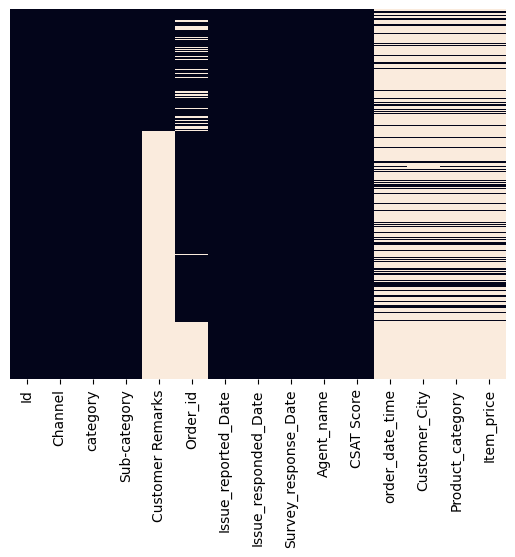

In [55]:
sns.heatmap(data_with_orders.isnull(), yticklabels=False, cbar=False);

##### Добавление данных менеджеров

In [56]:
agent_data = pd.read_csv("agents.csv", index_col=0)
agent_data.head()

,Agent,Supervisor,Manager,Tenure Bucket,Shift
0,Aaron Edwards,Mia Patel,Emily Chen,61-90,Evening
1,Aaron Romero,Mason Gupta,Jennifer Nguyen,On Job Training,Morning
2,Abigail Gonzalez,Jacob Sato,Jennifer Nguyen,On Job Training,Morning
3,Adam Barnett,Abigail Suzuki,Jennifer Nguyen,On Job Training,Morning
4,Adam Hammond,Olivia Suzuki,John Smith,31-60,Morning


In [57]:
agent_data.groupby(['Agent']).agg('count').head(20)

,Supervisor,Manager,Tenure Bucket,Shift
Agent,,,,
Aaron Edwards,1,1,1,1
Aaron Romero,1,1,1,1
Abigail Gonzalez,1,1,1,1
Adam Barnett,1,1,1,1
Adam Hammond,1,1,1,1
Adam Henderson,1,1,1,1
Adam Hernandez,1,1,1,1
Adam Schwartz,1,1,1,1
Adam Torres,1,1,1,1


In [58]:
agent_data['Agent_name'] = agent_data['Agent'].apply(
    lambda x: x.split()[0][0] + ". " + x.split()[1] if isinstance(x, str) else np.NAN
)

In [59]:
agent_data.groupby(['Agent_name']).agg('first').head(20)

,Agent,Supervisor,Manager,Tenure Bucket,Shift
Agent_name,,,,,
A. Adams,Adriana Adams,Sophia Sato,John Smith,0-30,Morning
A. Aguilar,Andrew Aguilar,Nathan Patel,Emily Chen,On Job Training,Evening
A. Barnett,Adam Barnett,Abigail Suzuki,Jennifer Nguyen,On Job Training,Morning
A. Barrett,Andrew Barrett,Elijah Yamaguchi,John Smith,>90,Evening
A. Barron,Alexandra Barron,Austin Johnson,Jennifer Nguyen,On Job Training,Evening
A. Beck,Andrea Beck,Evelyn Kimura,Jennifer Nguyen,On Job Training,Evening
A. Bell,Amy Bell,Wyatt Kim,Jennifer Nguyen,On Job Training,Evening
A. Benjamin,Amanda Benjamin,Amelia Tanaka,Emily Chen,>90,Morning
A. Berry,Amy Berry,Elijah Yamaguchi,John Smith,>90,Evening


In [60]:
data_123.groupby(['Agent_name']).agg('count').head(20)

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,CSAT Score
Agent_name,,,,,,,,,,
A. Adams,215,215,215,215,70,175,215,215,215,215
A. Aguilar,31,31,31,31,11,19,31,31,31,31
A. Barnett,56,56,56,56,22,41,56,56,56,56
A. Barrett,50,50,50,50,16,35,50,50,50,50
A. Barron,25,25,25,25,9,18,25,25,25,25
A. Beck,70,70,70,70,17,51,70,70,70,70
A. Bell,20,20,20,20,10,18,20,20,20,20
A. Benjamin,64,64,64,64,22,48,64,64,64,64
A. Berry,135,135,135,135,62,89,135,135,135,135


In [61]:
data_with_agents = data_with_orders.join(agent_data, rsuffix='_1', how='left')
data_with_agents.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,...,order_date_time,Customer_City,Product_category,Item_price,Agent,Supervisor,Manager,Tenure Bucket,Shift,Agent_name_1
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,04/08/2023 19:10,04/08/2023 19:13,04-Aug-23,J. Blackwell,...,NaN,NaN,NaN,NaN,Aaron Edwards,Mia Patel,Emily Chen,61-90,Evening,A. Edwards
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,18/08/2023 09:11,18/08/2023 09:18,18-Aug-23,M. Wilson,...,14/08/2023 00:42,NAYAGARH,Electronics,1499.0,Aaron Romero,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,A. Romero
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,22/08/2023 07:15,22/08/2023 08:15,22-Aug-23,A. Smith,...,NaN,NaN,NaN,NaN,Abigail Gonzalez,Jacob Sato,Jennifer Nguyen,On Job Training,Morning,A. Gonzalez
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,14/08/2023 09:21,14/08/2023 09:27,14-Aug-23,A. Berry,...,NaN,NaN,NaN,NaN,Adam Barnett,Abigail Suzuki,Jennifer Nguyen,On Job Training,Morning,A. Barnett
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,03/08/2023 08:18,03/08/2023 08:23,03-Aug-23,S. Taylor,...,NaN,NaN,NaN,NaN,Adam Hammond,Olivia Suzuki,John Smith,31-60,Morning,A. Hammond


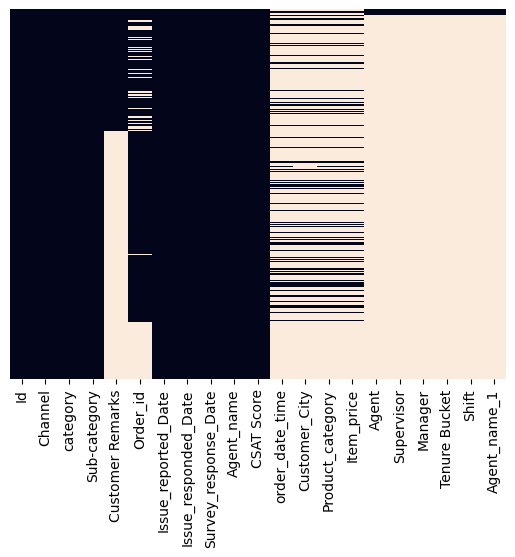

In [62]:
sns.heatmap(data_with_agents.isnull(), yticklabels=False, cbar=False);

In [63]:
data_with_agents = data_with_orders.merge(agent_data, how='left', on='Agent_name', copy=False)
data_with_agents.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,order_date_time,Customer_City,Product_category,Item_price,Agent,Supervisor,Manager,Tenure Bucket,Shift
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,04/08/2023 19:10,04/08/2023 19:13,04-Aug-23,J. Blackwell,1,NaN,NaN,NaN,NaN,James Blackwell,Jackson Park,William Kim,On Job Training,Evening
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,18/08/2023 09:11,18/08/2023 09:18,18-Aug-23,M. Wilson,4,14/08/2023 00:42,NAYAGARH,Electronics,1499.0,Mark Wilson,Scarlett Chen,John Smith,0-30,Morning
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,22/08/2023 07:15,22/08/2023 08:15,22-Aug-23,A. Smith,5,NaN,NaN,NaN,NaN,Anthony Smith,Mia Patel,John Smith,>90,Morning
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,14/08/2023 09:21,14/08/2023 09:27,14-Aug-23,A. Berry,5,NaN,NaN,NaN,NaN,Amy Berry,Elijah Yamaguchi,John Smith,>90,Evening
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,03/08/2023 08:18,03/08/2023 08:23,03-Aug-23,S. Taylor,5,NaN,NaN,NaN,NaN,Sarah Taylor,Carter Park,Jennifer Nguyen,On Job Training,Morning


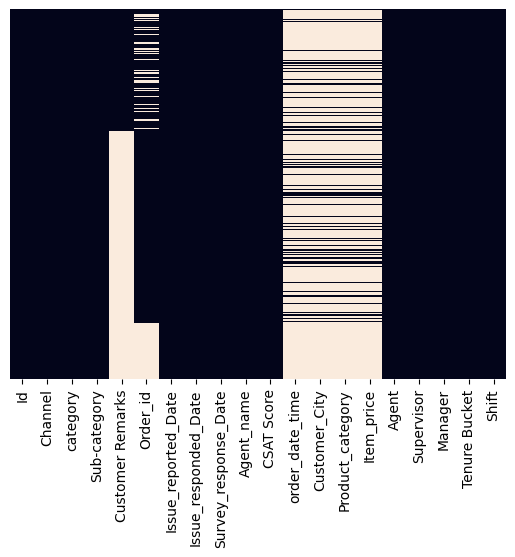

In [64]:
sns.heatmap(data_with_agents.isnull(), yticklabels=False, cbar=False);

In [65]:
agent_data.Agent_name.value_counts()

Agent_name
J. Moore        6
A. Brown        4
M. Smith        4
D. Smith        4
K. Martin       4
               ..
J. Meadows      1
J. Edwards      1
J. Schroeder    1
J. Robertson    1
Z. Simpson      1
Name: count, Length: 1221, dtype: int64

In [66]:
agent_data[agent_data.Agent_name == 'J. Moore']

,Agent,Supervisor,Manager,Tenure Bucket,Shift,Agent_name
468,Jacob Moore,Ava Wong,Jennifer Nguyen,On Job Training,Morning,J. Moore
529,Jenna Moore,Aiden Patel,John Smith,>90,Morning,J. Moore
542,Jennifer Moore,Nathan Patel,Jennifer Nguyen,On Job Training,Evening,J. Moore
612,Jon Moore,Ava Wong,William Kim,On Job Training,Evening,J. Moore
617,Jonathan Moore,Zoe Yamamoto,John Smith,>90,Morning,J. Moore
654,Juan Moore,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,J. Moore


In [67]:
data_with_agent_numbers = data_with_orders.merge(agent_data.Agent_name.value_counts(), how='left', left_on='Agent_name', right_index=True)

In [72]:
data_with_agent_numbers.Agent_name_y.value_counts()

AttributeError: 'DataFrame' object has no attribute 'Agent_name_y'

In [73]:
data_with_agent_numbers['Agent_name_x'] = data_with_agent_numbers.Agent_name_x.where(
    data_with_agent_numbers['Agent_name_y'] == 1.0, np.NAN
)

AttributeError: 'DataFrame' object has no attribute 'Agent_name_x'

In [74]:
data_with_agents = data_with_agent_numbers.merge(agent_data, how='left', left_on='Agent_name_x', right_on="Agent_name")
data_with_agents.info()

KeyError: 'Agent_name_x'

In [75]:
data_with_agents = data_with_agents.drop(['Agent_name_x', 'Agent_name_y', 'Agent_name'], axis=1)

KeyError: "['Agent_name_x', 'Agent_name_y'] not found in axis"

In [ ]:
sns.heatmap(data_with_agents.isnull(), yticklabels=False, cbar=False);

# Задания для самостоятельного выполнения

##### 1. При выполнении вертикального объединения убедитесь в отсутствии дубликатов данных.

In [76]:
data1

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,04/08/2023 19:10,04/08/2023 19:13,04-Aug-23,J. Blackwell,1
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,18/08/2023 09:11,18/08/2023 09:18,18-Aug-23,M. Wilson,4
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,22/08/2023 07:15,22/08/2023 08:15,22-Aug-23,A. Smith,5
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,14/08/2023 09:21,14/08/2023 09:27,14-Aug-23,A. Berry,5
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,03/08/2023 08:18,03/08/2023 08:23,03-Aug-23,S. Taylor,5
...,...,...,...,...,...,...,...,...,...,...,...
28420,64538432-9040-4fe2-9c50-da8f68358050,Outcall,Order Related,Order status enquiry,G,3215dbf5-47bf-4843-abee-f6eb36a808a7,24/08/2023 18:21,24/08/2023 21:44,24-Aug-23,J. Bailey,5
28421,3468bfda-b5c8-4795-bf13-ce3bd343d382,Inbound,Order Related,Delayed,My all doubt soul,3d8c15db-c338-4ead-b082-ebf2180df920,28/08/2023 13:16,28/08/2023 00:00,28-Aug-23,A. Clark,4
28422,83bcf710-7373-4572-a740-63c3a04b9fda,Inbound,Returns,Return request,Please don't send wrong product,NaN,16/08/2023 17:37,16/08/2023 17:43,16-Aug-23,J. Reynolds,5
28423,b959d639-c2c8-43c8-8edb-0063c273adc8,Inbound,Returns,Reverse Pickup Enquiry,Ekadam bakwas,aba1a75d-06c7-4523-9125-1e98aaa3842a,07/08/2023 10:42,07/08/2023 10:57,07-Aug-23,G. Campos,1


In [77]:
data2

,Id,Channel,category,Sub-category,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,6ba211fe-7643-4998-a7f7-cf34e5a4322c,Inbound,Order Related,Delayed,2dab4a7a-baf0-49f9-9d84-c8acdb4a11db,2023-08-21 21:01:00,2023-08-21 21:04:00,2023-08-21,A. Rodriguez,5
1,acef2550-cdd7-4e6a-b5b8-6d9627da9549,Inbound,Cancellation,Not Needed,5993a1f0-570d-4c82-95d9-6cc56c78043e,2023-08-18 21:20:00,2023-08-18 21:20:00,2023-08-18,R. Lee,5
2,46d012ec-cb21-40ce-afe1-5fe78905250a,Inbound,Returns,Return request,b64f579f-d913-4e85-978f-d0f6de902c3f,2023-08-24 21:57:00,2023-08-24 21:58:00,2023-08-24,S. Douglas,5
3,1671c7fa-e527-4a05-8f1f-9a865dad9778,Outcall,Cancellation,Not Needed,b754581f-a2a4-4ef2-abb1-aca09ac1a89c,2023-08-28 23:38:00,2023-08-29 05:55:00,2023-08-29,T. Adams,5
4,6e1923bd-de16-462b-a3ec-c60fb0ffe194,Inbound,Refund Related,Refund Enquiry,a1c40c79-e7a6-4faa-b948-0a32c3e3576a,2023-08-30 11:03:00,2023-08-30 11:04:00,2023-08-30,L. Beck,5
...,...,...,...,...,...,...,...,...,...,...
44334,0e5c4973-24bc-4d7d-9eb4-54c868721109,Inbound,Product Queries,Product Specific Information,74ca7f8d-9c52-4902-b981-6fb6a5932c72,2023-08-08 12:13:00,2023-08-08 18:44:00,2023-08-08,J. Kelly,5
44335,2fb101c6-3f7d-46ea-a0cb-c6a7b085d1d1,Inbound,Shopzilla Related,General Enquiry,7cc638a3-6273-4e2a-86ea-60436df6c0b9,2023-08-22 19:37:00,2023-08-22 20:21:00,2023-08-22,S. Nelson,5
44336,cbb0d288-a7d7-40b8-a52a-2896ba4d7ce2,Inbound,Returns,Return request,af616b51-6739-48cd-a8f5-4f04b5eb8f79,2023-08-12 16:39:00,2023-12-08 16:43:00,2023-08-12,D. Terry,5
44337,8de9d211-cf76-4447-962c-0517b922b548,Inbound,Returns,Service Centres Related,95de5b8a-145e-4282-a631-ddec3017d912,2023-08-27 08:19:00,2023-08-27 08:21:00,2023-08-27,G. Jones,5


In [78]:
data3

,Id,Channel,category,Sub-category,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,3350ccee-ead7-40fa-80c6-cc7b5e6e345a,Inbound,Returns,Reverse Pickup Enquiry,2023-08-27 08:28:00,2023-08-27 08:29:00,2023-08-27,T. Young,5
1,4a88df6e-aafb-477a-bd8e-63ffc34c1a43,Inbound,Returns,Wrong,2023-12-08 15:04:00,2023-08-12 15:19:00,2023-08-12,B. Cox,4
2,7b5dbea2-2370-490a-8fef-4c5f7c52a4cc,Inbound,Returns,Reverse Pickup Enquiry,2023-08-13 12:45:00,2023-08-13 13:02:00,2023-08-13,B. Mcguire,5
3,c6d4401e-a4ef-4de0-af68-a8755b928f5f,Inbound,Refund Related,Refund Enquiry,2023-06-08 18:07:00,2023-08-06 18:08:00,2023-08-06,D. Heather,5
4,423bd17e-e944-4f6e-beff-9c97fa325d9e,Inbound,Returns,Reverse Pickup Enquiry,2023-04-08 22:05:00,2023-08-04 22:08:00,2023-08-04,K. Adams,5
...,...,...,...,...,...,...,...,...,...
13138,ea09d98a-63d4-4143-8035-0e92c468baca,Inbound,Payments related,Online Payment Issues,2023-08-16 15:10:00,2023-08-16 15:12:00,2023-08-16,K. Schultz,5
13139,ebf0a860-c06d-4a10-a631-43787004d7dc,Inbound,Returns,Reverse Pickup Enquiry,2023-08-15 16:16:00,2023-08-15 16:20:00,2023-08-15,B. Frost,5
13140,e5bd9747-3a7e-4c3e-8972-670fa338b4c8,Inbound,Order Related,Priority delivery,2023-08-27 16:23:00,2023-08-27 16:25:00,2023-08-27,D. Wright,1
13141,13bfa4ab-d0b2-455d-b5d4-dbbb8c4de450,Inbound,Returns,Reverse Pickup Enquiry,2023-03-08 14:51:00,2023-08-03 15:08:00,2023-08-03,M. Edwards,5


In [79]:
pd.merge(left=data1, right=data2, on="Id", how="inner")

,Id,Channel_x,category_x,Sub-category_x,Customer Remarks,Order_id_x,Issue_reported_Date_x,Issue_responded_Date_x,Survey_response_Date_x,Agent_name_x,CSAT Score_x,Channel_y,category_y,Sub-category_y,Order_id_y,Issue_reported_Date_y,Issue_responded_Date_y,Survey_response_Date_y,Agent_name_y,CSAT Score_y


In [80]:
pd.merge(left=data3, right=data2, on="Id", how="inner")

,Id,Channel_x,category_x,Sub-category_x,Issue_reported_Date_x,Issue_responded_Date_x,Survey_response_Date_x,Agent_name_x,CSAT Score_x,Channel_y,category_y,Sub-category_y,Order_id,Issue_reported_Date_y,Issue_responded_Date_y,Survey_response_Date_y,Agent_name_y,CSAT Score_y


In [81]:
pd.merge(left=data3, right=data1, on="Id", how="inner")

,Id,Channel_x,category_x,Sub-category_x,Issue_reported_Date_x,Issue_responded_Date_x,Survey_response_Date_x,Agent_name_x,CSAT Score_x,Channel_y,category_y,Sub-category_y,Customer Remarks,Order_id,Issue_reported_Date_y,Issue_responded_Date_y,Survey_response_Date_y,Agent_name_y,CSAT Score_y


##### 2. При горизонтальной интеграции первой и второй таблицы выведите по каждому столбцу гистограмму распределения или плотность распределения, чтобы убедиться, что признаки выражаются по соотносимым шкалам.

In [82]:
data1

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,04/08/2023 19:10,04/08/2023 19:13,04-Aug-23,J. Blackwell,1
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,18/08/2023 09:11,18/08/2023 09:18,18-Aug-23,M. Wilson,4
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,22/08/2023 07:15,22/08/2023 08:15,22-Aug-23,A. Smith,5
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,14/08/2023 09:21,14/08/2023 09:27,14-Aug-23,A. Berry,5
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,03/08/2023 08:18,03/08/2023 08:23,03-Aug-23,S. Taylor,5
...,...,...,...,...,...,...,...,...,...,...,...
28420,64538432-9040-4fe2-9c50-da8f68358050,Outcall,Order Related,Order status enquiry,G,3215dbf5-47bf-4843-abee-f6eb36a808a7,24/08/2023 18:21,24/08/2023 21:44,24-Aug-23,J. Bailey,5
28421,3468bfda-b5c8-4795-bf13-ce3bd343d382,Inbound,Order Related,Delayed,My all doubt soul,3d8c15db-c338-4ead-b082-ebf2180df920,28/08/2023 13:16,28/08/2023 00:00,28-Aug-23,A. Clark,4
28422,83bcf710-7373-4572-a740-63c3a04b9fda,Inbound,Returns,Return request,Please don't send wrong product,NaN,16/08/2023 17:37,16/08/2023 17:43,16-Aug-23,J. Reynolds,5
28423,b959d639-c2c8-43c8-8edb-0063c273adc8,Inbound,Returns,Reverse Pickup Enquiry,Ekadam bakwas,aba1a75d-06c7-4523-9125-1e98aaa3842a,07/08/2023 10:42,07/08/2023 10:57,07-Aug-23,G. Campos,1


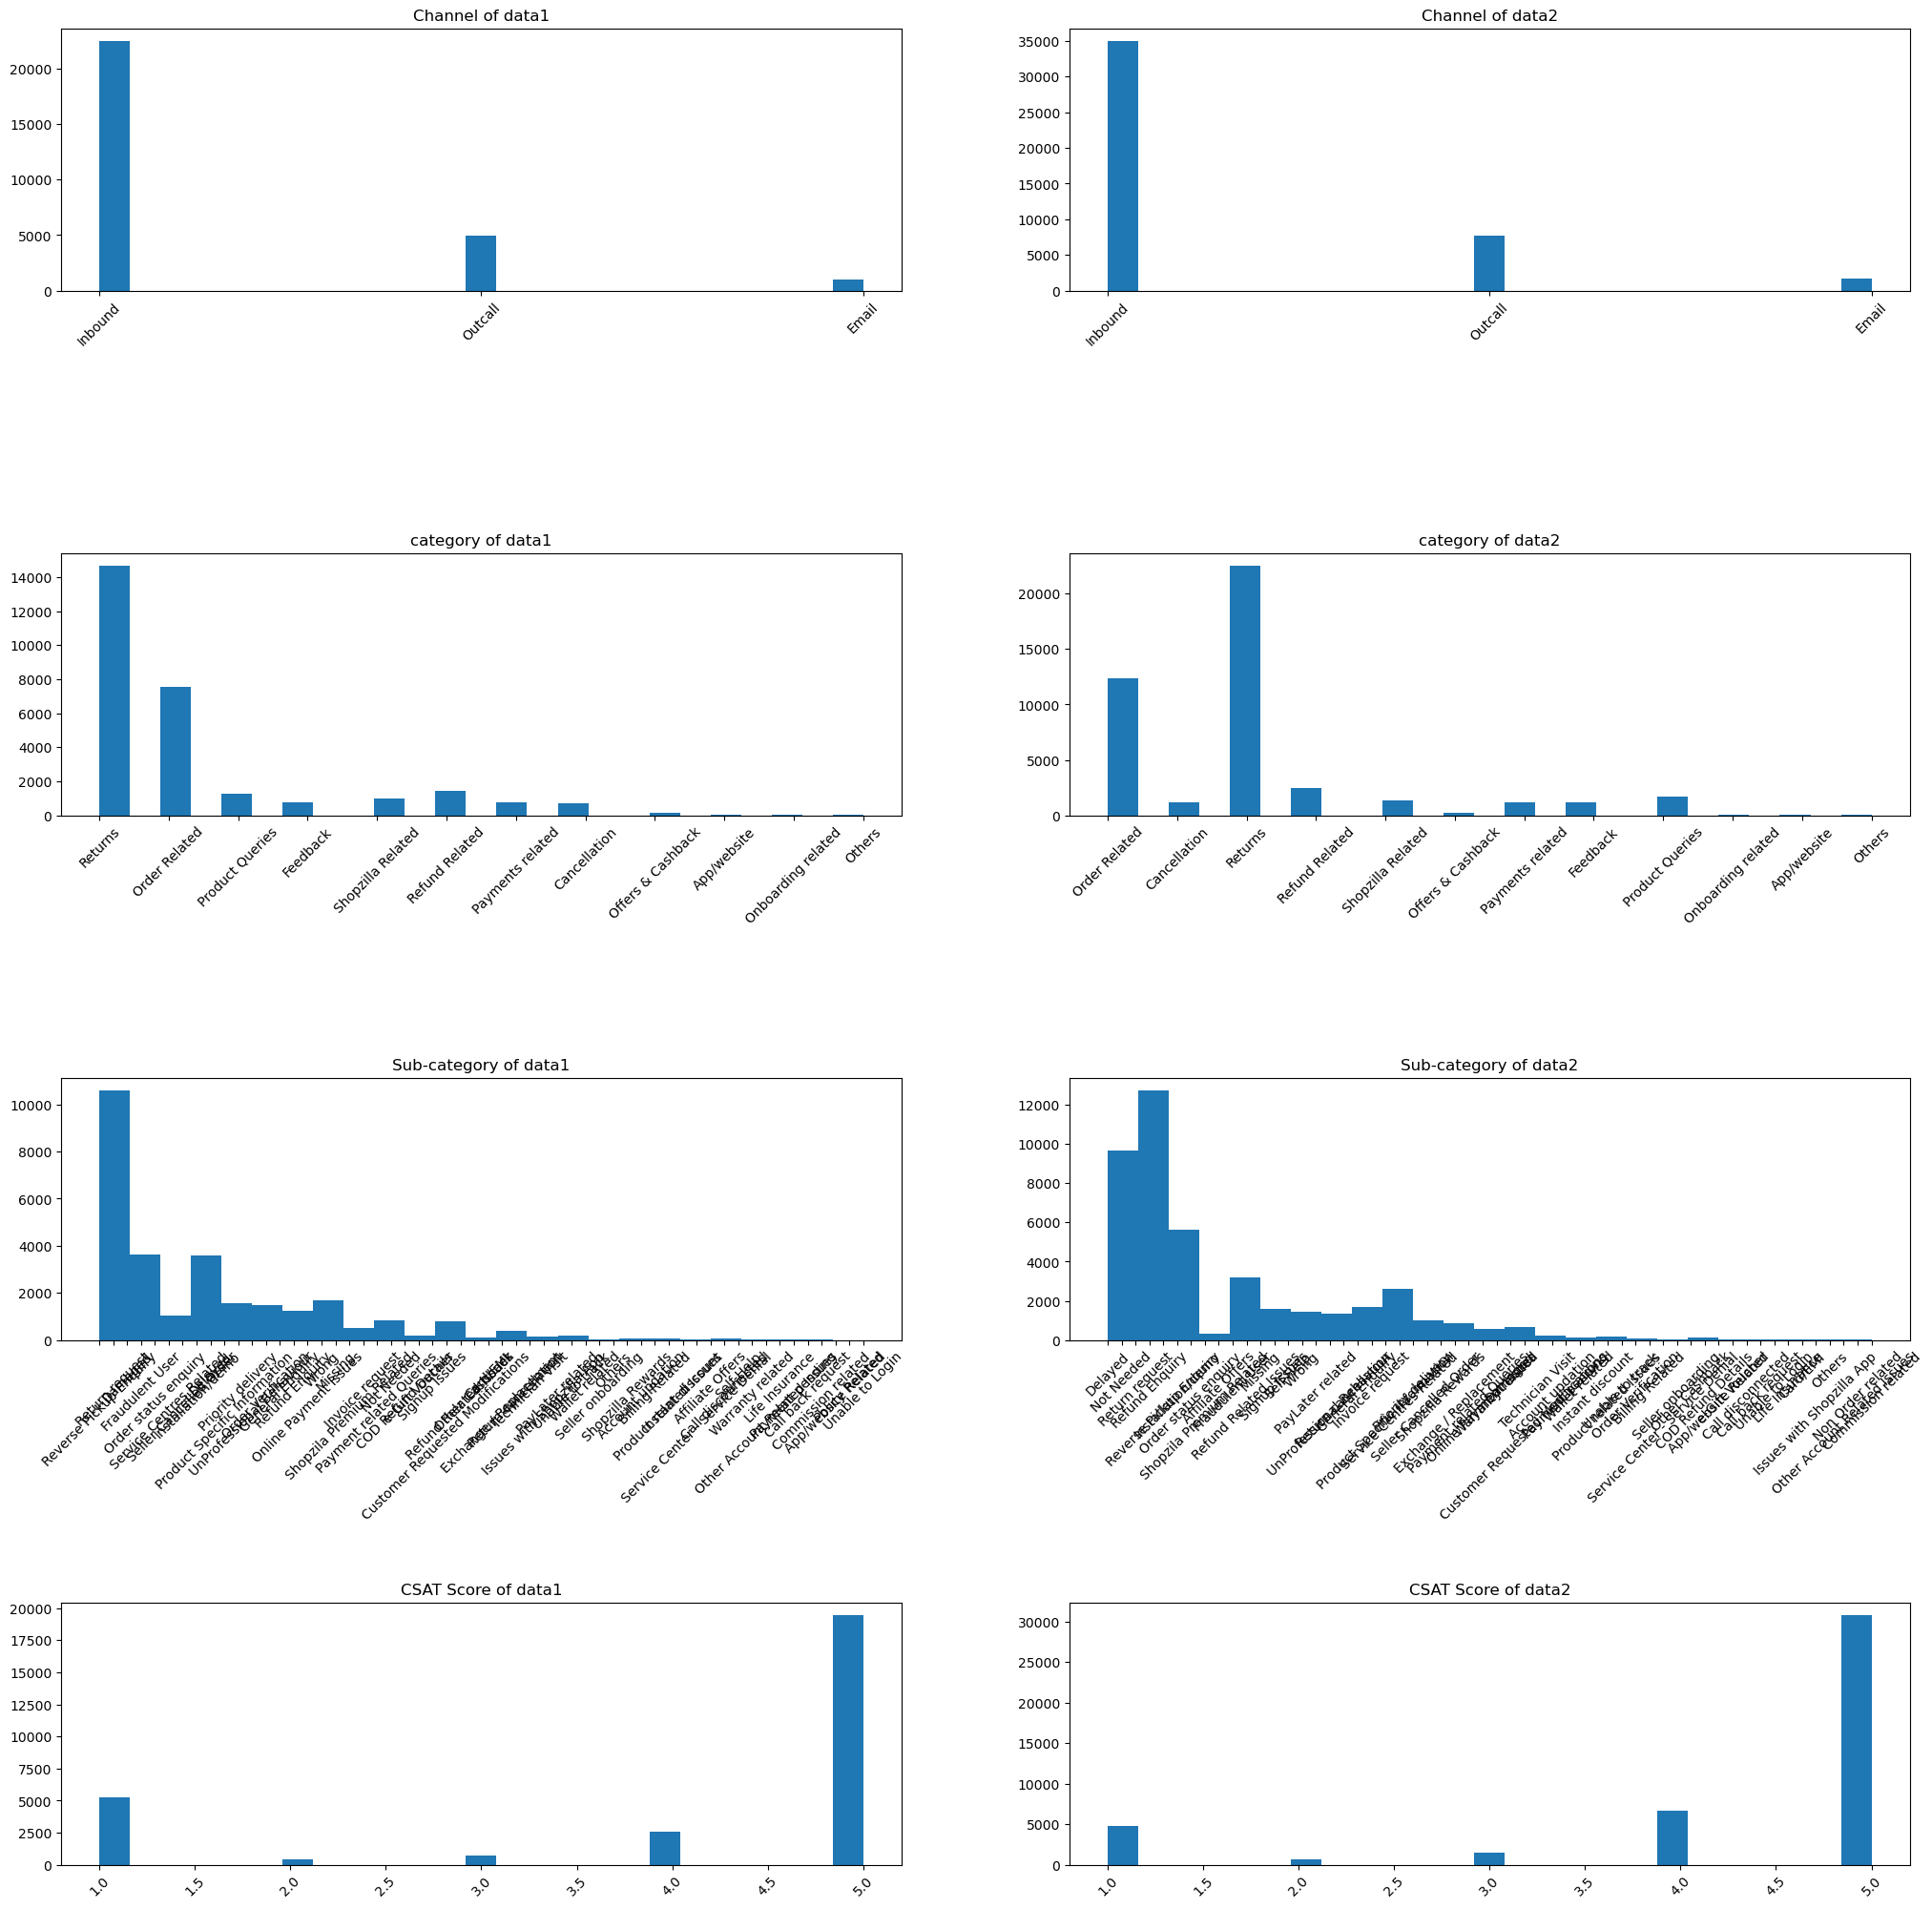

In [87]:
plots = 4 * 2
rows = 4
cols = 2
compare_cols = ["Channel", "category", "Sub-category", "CSAT Score"]
f = plt.figure(figsize=(25, 25))
for i in range(1, plots+1, 2):
    plt.subplot(rows, cols, i)
    plt.title(f'{compare_cols[i//2]} of data1')
    plt.xticks(rotation=45)
    plt.hist(data1[compare_cols[i//2]], bins=25)
    plt.subplot(rows, cols, i+1)
    plt.title(f'{compare_cols[i//2]} of data2')
    plt.xticks(rotation=45)  
    plt.hist(data2[compare_cols[i//2]], bins=25)

f.subplots_adjust(wspace=0.2, hspace=1)
plt.show()

##### 3. При выполнении третьего задания убедитесь более явно, что обильное количество пропущенных значений не является ошибкой объединения. Проведите больше, чем одну точечную проверку.

In [88]:
data_with_orders = data_123.merge(orders_data, on='Order_id', how='left')
data_with_orders

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,order_date_time,Customer_City,Product_category,Item_price
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,04/08/2023 19:10,04/08/2023 19:13,04-Aug-23,J. Blackwell,1,NaN,NaN,NaN,NaN
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,18/08/2023 09:11,18/08/2023 09:18,18-Aug-23,M. Wilson,4,14/08/2023 00:42,NAYAGARH,Electronics,1499.0
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,22/08/2023 07:15,22/08/2023 08:15,22-Aug-23,A. Smith,5,NaN,NaN,NaN,NaN
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,14/08/2023 09:21,14/08/2023 09:27,14-Aug-23,A. Berry,5,NaN,NaN,NaN,NaN
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,03/08/2023 08:18,03/08/2023 08:23,03-Aug-23,S. Taylor,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,ea09d98a-63d4-4143-8035-0e92c468baca,Inbound,Payments related,Online Payment Issues,NaN,NaN,2023-08-16 15:10:00,2023-08-16 15:12:00,2023-08-16 00:00:00,K. Schultz,5,NaN,NaN,NaN,NaN
85903,ebf0a860-c06d-4a10-a631-43787004d7dc,Inbound,Returns,Reverse Pickup Enquiry,NaN,NaN,2023-08-15 16:16:00,2023-08-15 16:20:00,2023-08-15 00:00:00,B. Frost,5,NaN,NaN,NaN,NaN
85904,e5bd9747-3a7e-4c3e-8972-670fa338b4c8,Inbound,Order Related,Priority delivery,NaN,NaN,2023-08-27 16:23:00,2023-08-27 16:25:00,2023-08-27 00:00:00,D. Wright,1,NaN,NaN,NaN,NaN
85905,13bfa4ab-d0b2-455d-b5d4-dbbb8c4de450,Inbound,Returns,Reverse Pickup Enquiry,NaN,NaN,2023-03-08 14:51:00,2023-08-03 15:08:00,2023-08-03 00:00:00,M. Edwards,5,NaN,NaN,NaN,NaN


In [89]:
ids = data_with_orders[data_with_orders["Customer_City"].isna()]
ids

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,order_date_time,Customer_City,Product_category,Item_price
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,04/08/2023 19:10,04/08/2023 19:13,04-Aug-23,J. Blackwell,1,NaN,NaN,NaN,NaN
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,22/08/2023 07:15,22/08/2023 08:15,22-Aug-23,A. Smith,5,NaN,NaN,NaN,NaN
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,14/08/2023 09:21,14/08/2023 09:27,14-Aug-23,A. Berry,5,NaN,NaN,NaN,NaN
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,03/08/2023 08:18,03/08/2023 08:23,03-Aug-23,S. Taylor,5,NaN,NaN,NaN,NaN
6,0c3b7959-19fe-4c85-99e1-d096ca000a98,Inbound,Returns,Service Centres Related,Sinha ji is amazing,e4e66d36-19af-4193-aaf9-c089792009a3,20/08/2023 21:56,20/08/2023 23:03,20-Aug-23,T. Lane,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,ea09d98a-63d4-4143-8035-0e92c468baca,Inbound,Payments related,Online Payment Issues,NaN,NaN,2023-08-16 15:10:00,2023-08-16 15:12:00,2023-08-16 00:00:00,K. Schultz,5,NaN,NaN,NaN,NaN
85903,ebf0a860-c06d-4a10-a631-43787004d7dc,Inbound,Returns,Reverse Pickup Enquiry,NaN,NaN,2023-08-15 16:16:00,2023-08-15 16:20:00,2023-08-15 00:00:00,B. Frost,5,NaN,NaN,NaN,NaN
85904,e5bd9747-3a7e-4c3e-8972-670fa338b4c8,Inbound,Order Related,Priority delivery,NaN,NaN,2023-08-27 16:23:00,2023-08-27 16:25:00,2023-08-27 00:00:00,D. Wright,1,NaN,NaN,NaN,NaN
85905,13bfa4ab-d0b2-455d-b5d4-dbbb8c4de450,Inbound,Returns,Reverse Pickup Enquiry,NaN,NaN,2023-03-08 14:51:00,2023-08-03 15:08:00,2023-08-03 00:00:00,M. Edwards,5,NaN,NaN,NaN,NaN


In [90]:
pd.merge(left=ids, right=orders_data, left_on="Id", right_on="Order_id", how="inner")

,Id,Channel,category,Sub-category,Customer Remarks,Order_id_x,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,order_date_time_x,Customer_City_x,Product_category_x,Item_price_x,Order_id_y,order_date_time_y,Customer_City_y,Product_category_y,Item_price_y


##### 4. При выполнении третьего задания попробуйте использовать разные виды соединений. Как это отражается на структуре датасета?

In [91]:
data_with_orders = data_123.merge(orders_data, on='Order_id', how='left')
data_with_orders

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,order_date_time,Customer_City,Product_category,Item_price
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,04/08/2023 19:10,04/08/2023 19:13,04-Aug-23,J. Blackwell,1,NaN,NaN,NaN,NaN
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,18/08/2023 09:11,18/08/2023 09:18,18-Aug-23,M. Wilson,4,14/08/2023 00:42,NAYAGARH,Electronics,1499.0
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,22/08/2023 07:15,22/08/2023 08:15,22-Aug-23,A. Smith,5,NaN,NaN,NaN,NaN
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,14/08/2023 09:21,14/08/2023 09:27,14-Aug-23,A. Berry,5,NaN,NaN,NaN,NaN
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,03/08/2023 08:18,03/08/2023 08:23,03-Aug-23,S. Taylor,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,ea09d98a-63d4-4143-8035-0e92c468baca,Inbound,Payments related,Online Payment Issues,NaN,NaN,2023-08-16 15:10:00,2023-08-16 15:12:00,2023-08-16 00:00:00,K. Schultz,5,NaN,NaN,NaN,NaN
85903,ebf0a860-c06d-4a10-a631-43787004d7dc,Inbound,Returns,Reverse Pickup Enquiry,NaN,NaN,2023-08-15 16:16:00,2023-08-15 16:20:00,2023-08-15 00:00:00,B. Frost,5,NaN,NaN,NaN,NaN
85904,e5bd9747-3a7e-4c3e-8972-670fa338b4c8,Inbound,Order Related,Priority delivery,NaN,NaN,2023-08-27 16:23:00,2023-08-27 16:25:00,2023-08-27 00:00:00,D. Wright,1,NaN,NaN,NaN,NaN
85905,13bfa4ab-d0b2-455d-b5d4-dbbb8c4de450,Inbound,Returns,Reverse Pickup Enquiry,NaN,NaN,2023-03-08 14:51:00,2023-08-03 15:08:00,2023-08-03 00:00:00,M. Edwards,5,NaN,NaN,NaN,NaN


In [92]:
data_with_orders = data_123.merge(orders_data, on='Order_id', how='right')
data_with_orders

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,order_date_time,Customer_City,Product_category,Item_price
0,NaN,NaN,NaN,NaN,NaN,53465d50-a568-48a9-b96e-ee2a0524fee8,NaN,NaN,NaN,NaN,NaN,14/08/2023 18:54,NEW DELHI,Books & General merchandise,144.0
1,NaN,NaN,NaN,NaN,NaN,57d64c28-e3dc-49bd-8e8a-8e24572c6b59,NaN,NaN,NaN,NaN,NaN,30/07/2023 21:43,HAJIPUR,Home,445.0
2,NaN,NaN,NaN,NaN,NaN,55d4e1bb-e148-437f-aa83-3bfbae939155,NaN,NaN,NaN,NaN,NaN,10/07/2023 21:20,HYDERABAD,LifeStyle,399.0
3,NaN,NaN,NaN,NaN,NaN,509803e9-4c15-4db4-bbe7-fc1e12b6c6cc,NaN,NaN,NaN,NaN,NaN,08/08/2023 16:40,JASPUR,Mobile,32999.0
4,NaN,NaN,NaN,NaN,NaN,5cfbe41f-ffcc-4fcf-8520-94bb61dee14e,NaN,NaN,NaN,NaN,NaN,07/08/2023 08:29,JHAJJAR,Electronics,1499.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86065,NaN,NaN,NaN,NaN,NaN,53f65b15-6f1a-4aac-8a59-2d5f3d564707,NaN,NaN,NaN,NaN,NaN,08/08/2023 23:08,HYDERABAD,Mobile,14999.0
86066,NaN,NaN,NaN,NaN,NaN,5f1397ed-bbdc-4f05-83a3-fec901fbaf0c,NaN,NaN,NaN,NaN,NaN,30/07/2023 16:43,FARIDABAD,LifeStyle,1612.0
86067,NaN,NaN,NaN,NaN,NaN,52707a4a-249d-4f2b-a0d3-442819b37bc6,NaN,NaN,NaN,NaN,NaN,18/08/2023 12:54,KAKINADA,Mobile,12999.0
86068,NaN,NaN,NaN,NaN,NaN,5c3c4b95-a9f4-4604-a8b7-dd49811298bd,NaN,NaN,NaN,NaN,NaN,19/07/2023 14:10,CHATRAPUR,Home Appliences,18900.0


In [93]:
data_with_orders = data_123.merge(orders_data, on='Order_id', how='inner')
data_with_orders

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,order_date_time,Customer_City,Product_category,Item_price
0,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,18/08/2023 09:11,18/08/2023 09:18,18-Aug-23,M. Wilson,4,14/08/2023 00:42,NAYAGARH,Electronics,1499.0
1,9a9432e9-948b-4eaa-86fc-4c2ccb877fd0,Inbound,Order Related,Order status enquiry,Best,b922ec6e-d3d2-4522-be34-d8c89e45f4c4,26/08/2023 07:49,26/08/2023 07:57,26-Aug-23,D. Perez,5,19/08/2023 06:55,SRINAGAR,Electronics,999.0
2,406d7a47-7dc6-4504-be9b-5ff044a7bb3a,Inbound,Order Related,Delayed,Change your delivery partner to some responsible,045e5c18-1211-4d5e-a7cd-c2af955c80d6,24/08/2023 14:55,25/08/2023 14:20,25-Aug-23,S. Huber,1,17/08/2023 20:55,SURAT,Mobile,26935.0
3,a4365adc-b4cb-4de6-9a6d-9ca56d07030b,Inbound,Order Related,Delayed,Great effort,96db2a63-2d31-4a54-af49-d02dcc9efab0,09/08/2023 08:47,09/08/2023 12:20,09-Aug-23,J. Gibson,5,29/07/2023 12:42,RAJOURI,Books & General merchandise,253.0
4,edddcc47-a99c-4fa2-8c36-3acb1361a98e,Inbound,Order Related,Priority delivery,Shopzilla customer care service was very good ...,15fe6fa0-07d1-4568-a78e-bb5760771d1e,11/08/2023 21:45,11/08/2023 21:48,11-Aug-23,C. Crawford,5,10/08/2023 11:32,BHUJ,Books & General merchandise,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16946,0bb1b0ac-8012-4873-8f52-abe8e7efca7c,Inbound,Returns,Exchange / Replacement,NaN,88455ba3-f5e7-4d17-b59b-97319b55e3f8,2023-08-05 12:55:00,2023-05-08 12:55:00,2023-08-05 00:00:00,C. Holmes,2,21/07/2023 12:33,ALIGARH,Mobile,49999.0
16947,a160f3e1-1b49-4e1b-82cd-b055a997a2e5,Inbound,Returns,Reverse Pickup Enquiry,NaN,72faf1c3-1630-4895-905c-853f2b81fadb,2023-08-01 12:47:00,2023-01-08 12:51:00,2023-08-01 00:00:00,A. Hayes,2,16/07/2023 10:53,GAYA,Books & General merchandise,220.0
16948,cbb0d288-a7d7-40b8-a52a-2896ba4d7ce2,Inbound,Returns,Return request,NaN,af616b51-6739-48cd-a8f5-4f04b5eb8f79,2023-08-12 16:39:00,2023-12-08 16:43:00,2023-08-12 00:00:00,D. Terry,5,03/08/2023 19:48,PATNA,Electronics,769.0
16949,8de9d211-cf76-4447-962c-0517b922b548,Inbound,Returns,Service Centres Related,NaN,95de5b8a-145e-4282-a631-ddec3017d912,2023-08-27 08:19:00,2023-08-27 08:21:00,2023-08-27 00:00:00,G. Jones,5,15/04/2023 23:26,NEW DELHI,Electronics,854.0


##### 5. Изучите документацию pandas в части описания методов merge и join.

##### 6. Познакомьтесь с форматом представления дат strftime.